### 1. 라이브러리

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 2. 데이터 로드하기

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [5]:
train.head()

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
0,0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,...,1.0,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1
1,1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,...,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
2,2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,...,2.0,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1
3,3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,...,1.0,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1
4,4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,...,2.0,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0


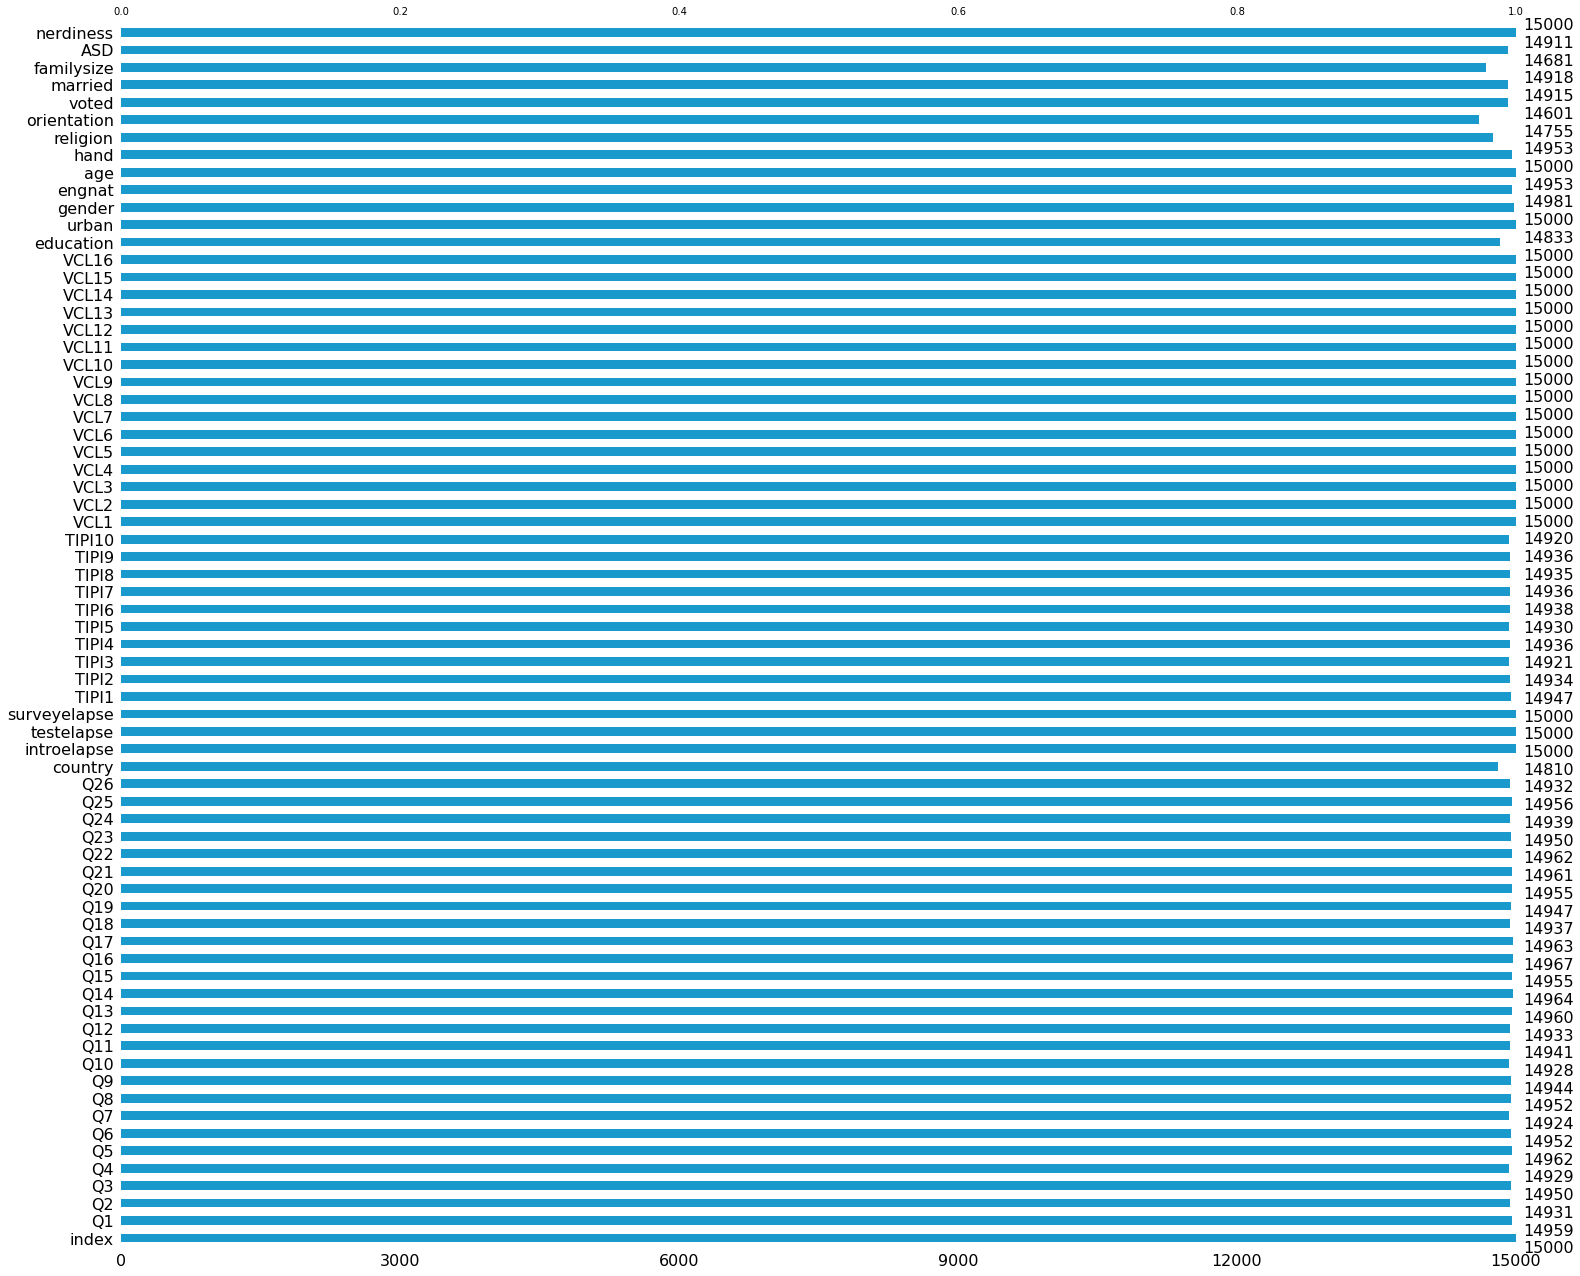

In [7]:
# 결측치 확인하기
import missingno as msno # 결측치 확인 라이브러리

msno.bar(train, color=(0.1, 0.6, 0.8)) # missingno 라이브러리를 이용하여 결측치 확인

### 3. EDA

#### 상관관계 분석

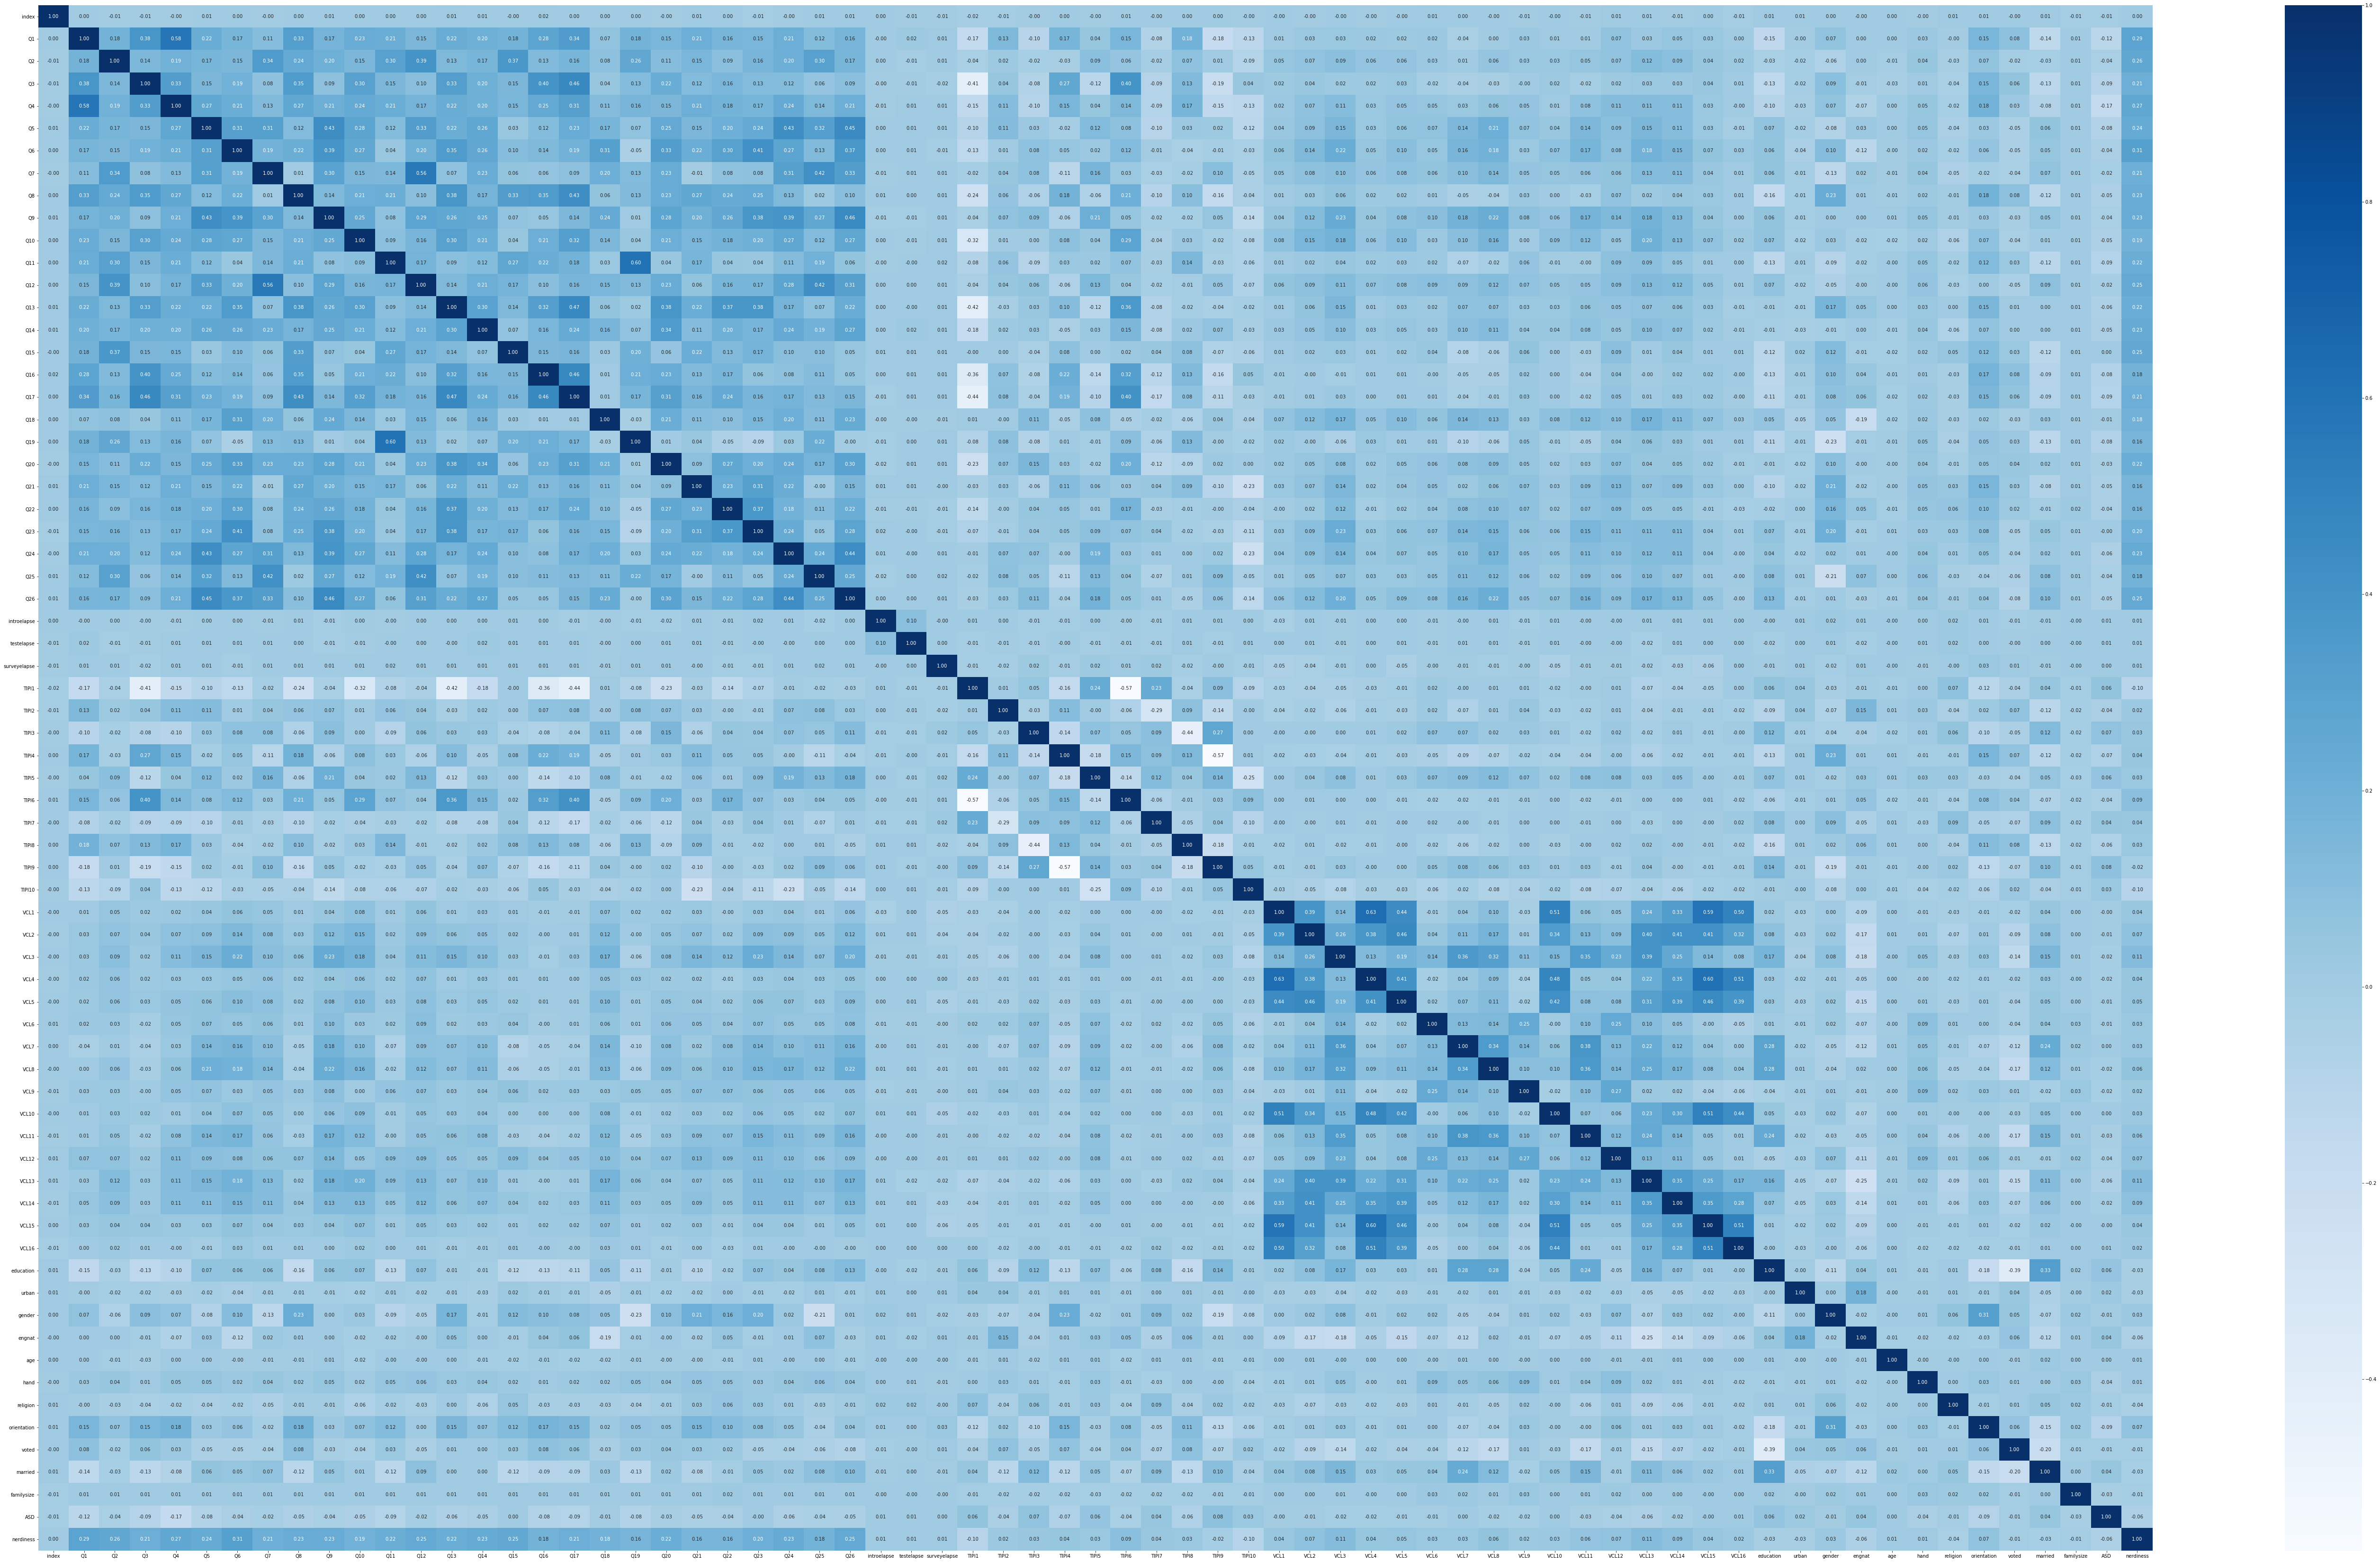

In [9]:
# 히트맵 상관관계 시각화 => 잘 안 보임
plt.figure(figsize=(100,60))
sns.heatmap(train.corr(), annot=True,cmap='Blues', fmt='.2f') 

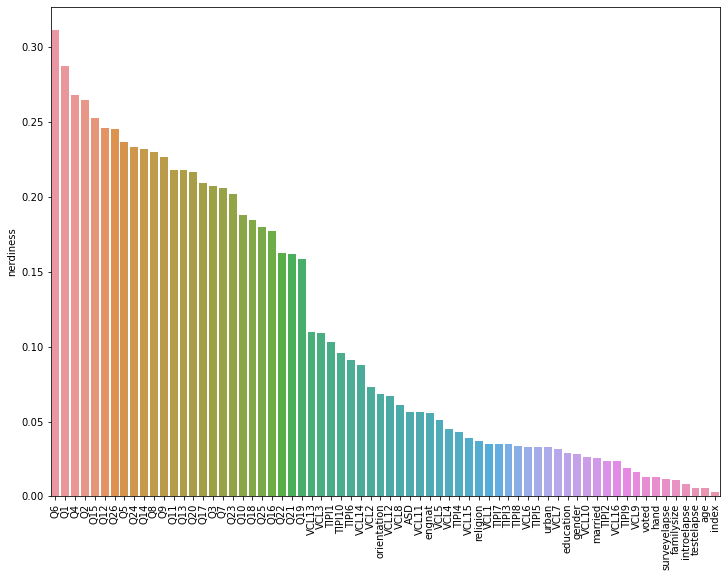

In [11]:
# 주로 Q1~Q26가 가장 중요해 보임  
plt.figure(figsize=(12,9)) # 사이즈 변경
plt.xticks(rotation = 90) # x축 text 회전
sns.barplot(x = abs(train.corr()["nerdiness"]).sort_values(ascending = False)[1:].index ,y = abs(train.corr()["nerdiness"]).sort_values(ascending = False)[1:]) 

In [23]:
train = train.drop(['index', 'age', 'testelapse', 'introelapse', 'familysize', 'surveyelapse', 'hand', 'voted'], axis=1)
test = test.drop(['index', 'age', 'testelapse', 'introelapse', 'familysize', 'surveyelapse', 'hand', 'voted'], axis=1)

In [24]:
train.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,VCL16,education,urban,gender,engnat,religion,orientation,married,ASD,nerdiness
count,14959.000000,14931.000000,14950.000000,14929.000000,14962.000000,14952.000000,14924.000000,14952.000000,14944.000000,14928.000000,...,15000.000000,14833.000000,15000.000000,14981.000000,14953.000000,14755.000000,14601.000000,14918.000000,14911.000000,15000.000000
mean,3.972859,4.065702,4.222809,3.795499,3.856503,3.676364,4.183262,3.879013,3.915418,4.110598,...,0.980600,2.314232,2.163867,1.703024,1.346018,4.098340,1.847956,1.179917,1.938703,0.553533
std,1.095914,1.169681,1.023335,1.219940,1.195622,1.170986,1.059756,1.302081,1.117625,1.047617,...,0.137931,0.921192,0.728274,0.553286,0.475715,3.425699,1.223191,0.465985,0.239882,0.497142
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,...,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000
50%,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,...,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,1.000000,3.000000,3.000000,2.000000,2.000000,6.000000,2.000000,1.000000,2.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,1.000000,4.000000,3.000000,3.000000,2.000000,12.000000,5.000000,3.000000,2.000000,1.000000


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 62 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Q1           14959 non-null  float64
 1   Q2           14931 non-null  float64
 2   Q3           14950 non-null  float64
 3   Q4           14929 non-null  float64
 4   Q5           14962 non-null  float64
 5   Q6           14952 non-null  float64
 6   Q7           14924 non-null  float64
 7   Q8           14952 non-null  float64
 8   Q9           14944 non-null  float64
 9   Q10          14928 non-null  float64
 10  Q11          14941 non-null  float64
 11  Q12          14933 non-null  float64
 12  Q13          14960 non-null  float64
 13  Q14          14964 non-null  float64
 14  Q15          14955 non-null  float64
 15  Q16          14967 non-null  float64
 16  Q17          14963 non-null  float64
 17  Q18          14937 non-null  float64
 18  Q19          14947 non-null  float64
 19  Q20 

### 모델링

In [26]:
!pip install xgboost==1.1.0

     ---------------------------------------- 37.7/37.7 MB 3.4 MB/s eta 0:00:00


In [28]:
!pip install -U --pre pycaret  

     -------------------------------------- 544.5/544.5 kB 1.6 MB/s eta 0:00:00
     -------------------------------------- 282.6/282.6 kB 3.5 MB/s eta 0:00:00
     -------------------------------------- 199.3/199.3 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 2.4/2.4 MB 4.3 MB/s eta 0:00:00
     ---------------------------------------- 43.8/43.8 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 4.7 MB/s eta 0:00:00
     -------------------------------------- 571.9/571.9 kB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 65.9/65.9 MB 5.9 MB/s eta 0:00:00
     ---------------------------------------- 6.7/6.7 MB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 10.6/10.6 MB 4.4 MB/s eta 0:00:00
  Using cached scikit_learn-1.1.2-cp38-cp38-win_amd64.whl (7.3 MB)
     ---------------------------------------- 69.1/69.1 kB 3.7 MB/s eta 0:00:00
  Using cached psutil-5.9.1-cp38-cp38-win_amd64.whl (246 kB

ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\AI06\\anaconda3\\Lib\\site-packages\\~~mpy\\.libs\\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [30]:
from pycaret.classification import *

In [ ]:
model = setup(data = train, target = "nerdiness", fold = 15)

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:35:45
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
Q1,Categorical
Q2,Categorical
Q3,Categorical
Q4,Categorical
Q5,Categorical
...,...
religion,Categorical
orientation,Categorical
married,Categorical
ASD,Categorical


In [ ]:
top5_model = compare_models(round=4, sort="AUC",n_select = 11)

In [ ]:
tuned_top5 = [tune_model(i,n_iter = 10) for i in top5_model]

In [ ]:
blender_top5 = stack_models(estimator_list=top5_model)

In [ ]:
final_model = finalize_model(blender_top5)

In [ ]:
prediction_train = predict_model(final_model, data=train.iloc[2300:])